In [1]:
from dataloader_class import *

In [2]:
dl = data_loader('data/covid2020.csv')

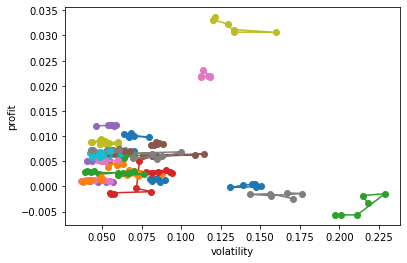

In [3]:
dl.split_windows(60)
dl.plot_trajectories()

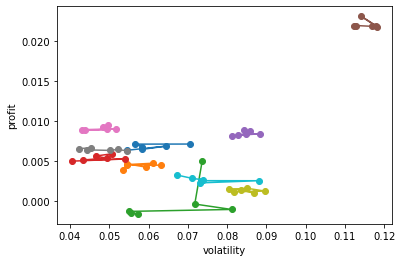

In [4]:
dl.filter_assets(num_assets=10, method='relevant')
dl.plot_trajectories()

In [5]:
mut = dl.return_mut()

In [6]:
sigmat = dl.return_sigmat()

In [7]:
stdt = dl.return_stdt()

# Starting with a simple Hamiltonian

In [27]:
import flatnetwork_simple as fns

In [32]:
L = [6,10,2]
d = 3

mu = lambda t,i: mut[t,i]
Sig = lambda t,i,j: sigmat[t,i,j]
#lam = lambda t,i: 0.001
rho = 5.0

fnet = fns.FlatNetwork(L,d)
fnet.loadParams(mu, rho)
fnet.make_mpos()

S, D = fnet.getHamiltonian()

Max MPO dim:  41


In [33]:
e, mps = fnet.run()

Schedule:  0  D =  1
Beginning sweep:  0 of 10
Sweep Energy: -13.60885180
Beginning sweep:  1 of 10
Sweep Energy: -15.09374222
Beginning sweep:  2 of 10
Sweep Energy: -15.09374222
Beginning sweep:  3 of 10
Sweep Energy: -15.09374222
Beginning sweep:  4 of 10
Sweep Energy: -15.09374222
Beginning sweep:  5 of 10
Sweep Energy: -15.09374222
-----------
Schedule:  1  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -17.23543406
Beginning sweep:  1 of 10
Sweep Energy: -22.70020939
Beginning sweep:  2 of 10
Sweep Energy: -25.31460044
Beginning sweep:  3 of 10
Sweep Energy: -25.32968298
Beginning sweep:  4 of 10
Sweep Energy: -25.32968298
Beginning sweep:  5 of 10
Sweep Energy: -26.32862111
Beginning sweep:  6 of 10
Sweep Energy: -26.32923308
Beginning sweep:  7 of 10
Sweep Energy: -26.32923308
-----------
Schedule:  2  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -26.82498051
Beginning sweep:  1 of 10
Sweep Energy: -27.82050631
Beginning sweep:  2 of 10
Sweep Energy: -27.82050631
-----------


In [34]:
fvs = fnet.computeWeights(mps)

In [40]:
fvm = np.zeros([L[1],L[0]])

for pair in fvs:
    fvm[pair[1],pair[0]] = fvs[pair]
    if(abs(fvs[pair]>1.0e-8)):
        print(pair, fvs[pair], mu(pair[0],pair[1]), Sig(pair[0],pair[1],pair[1]))

(0, 4) 0.3333333333333333 0.008831315432028851 0.42351690536741077
(0, 5) 0.6666666666666666 0.021922575365011913 0.8341327009109829
(0, 6) 0.2222222222222222 0.009211512033658668 0.1438452371343892
(0, 7) 0.2222222222222222 0.006255676436979685 0.17771917526785755
(0, 8) 0.2222222222222222 0.0009562187134270482 0.44547791570198747
(0, 9) 0.2222222222222222 0.0032457235074933428 0.267215276322534
(1, 4) 0.3333333333333333 0.008712378977171741 0.4387694419141958
(1, 5) 0.6666666666666666 0.02190051724304703 0.8489711725594385
(1, 6) 0.2222222222222222 0.009474482041204248 0.15038086156346928
(1, 7) 0.2222222222222222 0.006445442799982328 0.16344789154670017
(1, 8) 0.2222222222222222 0.001394468397815474 0.4119545351564344
(1, 9) 0.2222222222222222 0.00283845894537749 0.2976849702538271
(2, 4) 0.3333333333333333 0.008401429789161932 0.42960408194852834
(2, 5) 0.6666666666666666 0.023094857113390963 0.7994913582858759
(2, 6) 0.2222222222222222 0.00895308717251556 0.1488541326388922
(2, 7)

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight')

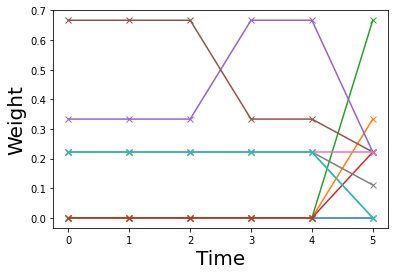

In [48]:
ts = [t for t in range(0,L[0])]

for i in range(10):
    plt.plot(ts,fvm[i,:],'-x')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Weight', fontsize=20)

Text(0, 0.5, 'Relative Profit')

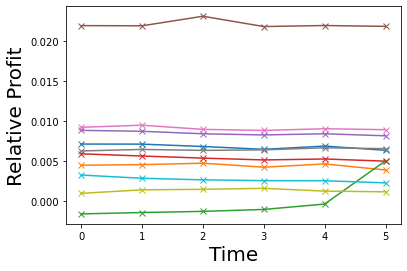

In [54]:
for i in range(10):
    plt.plot(ts,mut[:,i],'-x')
    
plt.xlabel('Time', fontsize=20)
plt.ylabel('Relative Profit', fontsize=20)

# Going then to Full Hamiltonian

In [8]:
import flatnetwork as ffns

In [9]:
L = [6,10,2]
d = 3

mu = lambda t,i: mut[t,i]
Sig = lambda t,i,j: sigmat[t,i,j]
lam = lambda t,i: 0.001
ga = 1.0
rho = 5.0

fnet = ffns.FlatNetwork(L,d)
fnet.loadParams(mu, lam, Sig, rho, ga)
fnet.make_mpos()

S, D = fnet.getHamiltonian()

Max MPO dim:  41
\Delta: 0.8888888888888888 Min rho:  0.2962962962962963 Supplied rho:  1000.0


In [10]:
e, mps = fnet.run()

Schedule:  0  D =  1
Beginning sweep:  0 of 10
Sweep Energy: -30.31092986
Beginning sweep:  1 of 10
Sweep Energy: -46.69815261
Beginning sweep:  2 of 10
Sweep Energy: -49.68614175
Beginning sweep:  3 of 10
Sweep Energy: -51.55857450
Beginning sweep:  4 of 10
Sweep Energy: -54.81412699
Beginning sweep:  5 of 10
Sweep Energy: -55.27604689
Beginning sweep:  6 of 10
Sweep Energy: -55.56338085
Beginning sweep:  7 of 10
Sweep Energy: -55.56338085
-----------
Schedule:  1  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -56.90492934
Beginning sweep:  1 of 10
Sweep Energy: -57.96050530
Beginning sweep:  2 of 10
Sweep Energy: -61.87811775
Beginning sweep:  3 of 10
Sweep Energy: -61.87811775
Beginning sweep:  4 of 10
Sweep Energy: -61.87811775
Beginning sweep:  5 of 10
Sweep Energy: -61.87811775
-----------
Schedule:  2  D =  2
Beginning sweep:  0 of 10
Sweep Energy: -61.87811775
Beginning sweep:  1 of 10
Sweep Energy: -61.90087759
Beginning sweep:  2 of 10
Sweep Energy: -61.90087759
-----------


In [11]:
fvs = fnet.computeWeights(mps)

In [12]:
fvm = np.zeros([L[1],L[0]])

for pair in fvs:
    fvm[pair[1],pair[0]] = fvs[pair]
    if(abs(fvs[pair]>1.0e-8)):
        print(pair, fvs[pair], mu(pair[0],pair[1]), Sig(pair[0],pair[1],pair[1]))

(0, 0) 0.3333333333333458 0.0071180488484006935 0.2958686128274988
(0, 1) 0.3333333333333458 0.00447059155331772 0.23614989190530702
(0, 2) 0.6666666666666788 -0.0016161180283090295 0.19354788845406087
(0, 3) 0.22222222222223473 0.005897505093278455 0.15328895055837838
(0, 6) 0.6666666666666788 0.009211512033658668 0.1438452371343892
(0, 7) 0.22222222222223473 0.006255676436979685 0.17771917526785755
(0, 8) 0.22222222222223473 0.0009562187134270482 0.44547791570198747
(0, 9) 0.22222222222223473 0.0032457235074933428 0.267215276322534
(1, 0) 0.8888888888889074 0.007107393173175401 0.19124865137252822
(1, 1) 0.6666666666666853 0.004544441543245608 0.1758279024664853
(1, 3) 0.66666666666669 0.005620256351139115 0.1295106491732913
(1, 4) 0.22222222222224738 0.008712378977171741 0.4387694419141958
(1, 5) 0.22222222222224738 0.02190051724304703 0.8489711725594385
(1, 7) 0.11111111111113631 0.006445442799982328 0.16344789154670017
(1, 9) 0.22222222222224264 0.00283845894537749 0.2976849702538

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight')

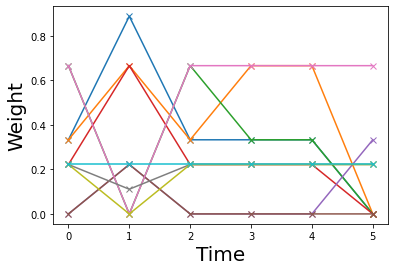

In [14]:
ts = [t for t in range(0,L[0])]

for i in range(10):
    plt.plot(ts,fvm[i,:],'-x')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Weight', fontsize=20)

Text(0, 0.5, 'Relative Profit')

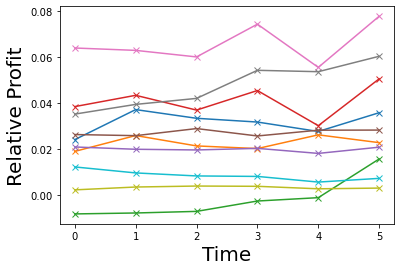

In [16]:
for i in range(10):
    plt.plot(ts,mut[:,i]/sigmat[:,i,i],'-x')
    
plt.xlabel('Time', fontsize=20)
plt.ylabel('Relative Profit/Volatility', fontsize=20)